In [241]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
import seaborn
%matplotlib inline
male_trends = pd.read_csv('state_slope_male.csv', index_col=0)
female_trends = pd.read_csv('state_slope_female.csv', index_col=0)

In [242]:
male_data = pd.DataFrame(male_trends.iloc[:,1])
female_data = pd.DataFrame(female_trends.iloc[:,1])

In [243]:
# Define eblow function
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

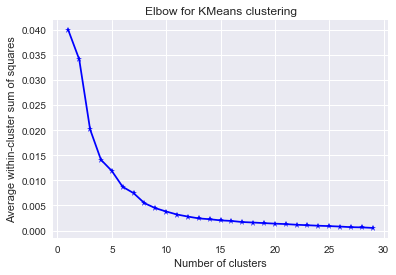

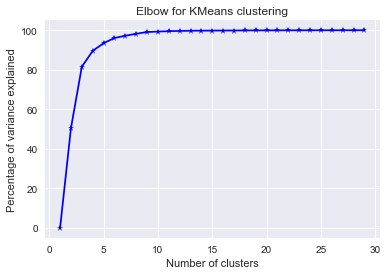

In [244]:
# Run elbow method for K in range 1-30
elbow(male_data, range(1,30))

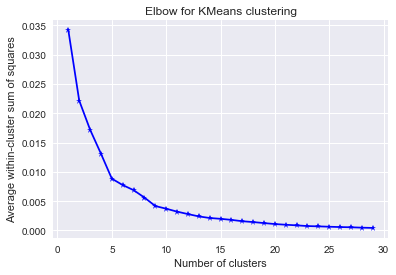

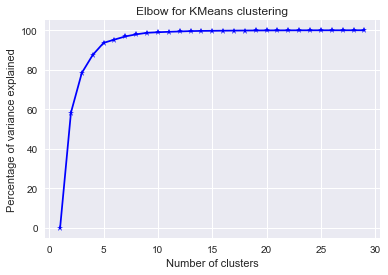

In [245]:
# Run elbow method for K in range 1-30
elbow(female_data, range(1,30))

In [246]:
# Cluster data using K-means
n = 4
km = KMeans(random_state=123, n_clusters=n)
res = km.fit(male_data)
# Add labels to original dataframe
male_trends['labels'] = res.labels_
male_trends.head()

,0,1,labels
0,Alabama,0.134530,2
1,Alaska,0.191072,0
2,ALASKA,0.191156,0
3,Arizona,0.201597,0
4,Arkansas,0.133795,2


In [247]:
# Cluster data using K-means
n = 4
km1 = KMeans(random_state=123, n_clusters=n)
res1 = km.fit(female_data)
# Add labels to original dataframe
female_trends['labels'] = res1.labels_
female_trends.head()

,0,1,labels
0,Alabama,0.026232,2
1,Alaska,0.075967,0
2,ALASKA,0.076068,0
3,Arizona,0.098602,0
4,Arkansas,0.031542,2


In [248]:
import geopandas as gpd

state_shp = gpd.read_file('cb_2015_us_state_500k.shp')
state_shp = state_shp[['NAME', 'geometry']]
state_shp = state_shp.to_crs({'init' :'epsg:4326'})

In [249]:
state_shp.head()

,NAME,geometry
0,Nebraska,"POLYGON ((-104.053418545071 41.1705389679833, ..."
1,Washington,"(POLYGON ((-122.33164 48.020556, -122.328343 4..."
2,New Mexico,"POLYGON ((-109.050173 31.480004, -109.049843 3..."
3,South Dakota,"POLYGON ((-104.057698 44.997431, -104.049505 4..."
4,Kentucky,"(POLYGON ((-89.405654 36.528165, -89.398685 36..."


In [250]:
# Check crs
state_shp.crs

{'init': 'epsg:4326'}

In [251]:
male_le_shp = pd.merge(male_trends, state_shp, how='left', left_on='0', right_on='NAME')
male_le_shp = male_le_shp[['NAME', 'labels', 'geometry']]

In [252]:
#crs = {'init': 'epsg:4326'}
male_le_shp = gpd.GeoDataFrame(male_le_shp, crs=crs)
male_le_shp.dropna(inplace=True)

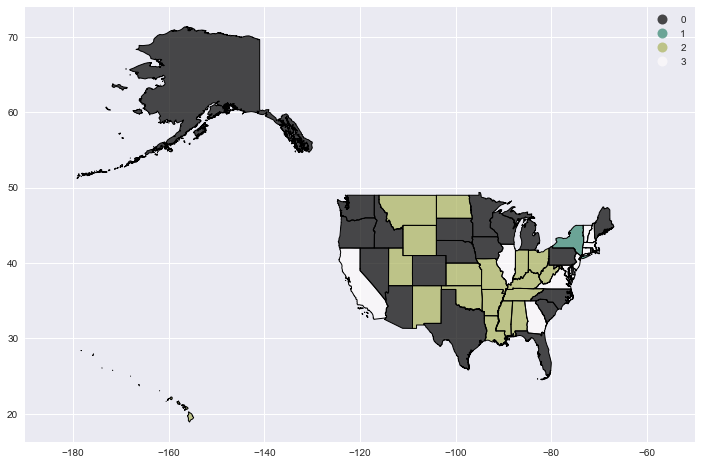

In [253]:
fig = plt.figure(figsize = (12,8))
ax = fig.gca()
ax.set_xlim(-190, -50)

male_le_shp.plot(ax=ax, column='labels', cmap='gist_earth', 
                 alpha=.7, categorical=True, legend=True)

In [254]:
female_le_shp = pd.merge(female_trends, state_shp, how='left', left_on='0', right_on='NAME')
female_le_shp = female_le_shp[['NAME', 'labels', 'geometry']]
female_le_shp = gpd.GeoDataFrame(female_le_shp, crs=crs)
female_le_shp.dropna(inplace=True)

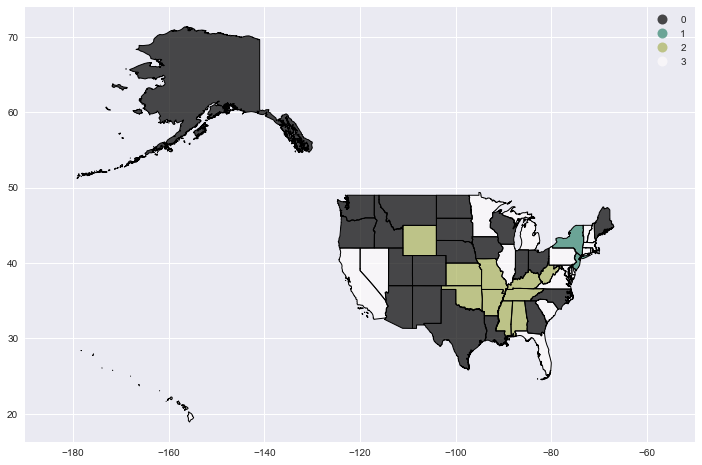

In [255]:
fig = plt.figure(figsize = (12,8))
ax = fig.gca()
ax.set_xlim(-190, -50)

female_le_shp.plot(ax=ax, column='labels', cmap='gist_earth', 
                 alpha=.7, categorical=True, legend=True)

In [260]:
for i in range(4):
    male_cluster = male_trends.loc[male_trends['labels'] == i]
    print 'Cluster ', i, ' slope range:', male_cluster['1'].min(),'-',male_cluster['1'].max()

Cluster  0  slope range: 0.173682051282 - 0.220082051282
Cluster  1  slope range: 0.349716239316 - 0.469863247863
Cluster  2  slope range: 0.0902837606837 - 0.167162393162
Cluster  3  slope range: 0.232174358974 - 0.279507692308


In [261]:
for i in range(4):
    female_cluster = female_trends.loc[female_trends['labels'] == i]
    print 'Cluster ', i, ' slope range:', female_cluster['1'].min(),'-',female_cluster['1'].max()

Cluster  0  slope range: 0.0587008547009 - 0.101052991453
Cluster  1  slope range: 0.175794871795 - 0.231193162393
Cluster  2  slope range: -0.0126666666667 - 0.0554837606838
Cluster  3  slope range: 0.105996581197 - 0.161203418803
